In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [6]:
df= pd.read_excel('US Store Data.xls')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2017-138688,2017-06-12,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [8]:
df.isnull().sum()

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
Quantity          0
Discount          0
Profit            0
dtype: int64

In [9]:
df.columns.unique()

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [10]:
df1= df[['Discount','Sales']]
df1

,Discount,Sales
0,0.00,261.9600
1,0.00,731.9400
2,0.00,14.6200
3,0.45,957.5775
4,0.20,22.3680
...,...,...
9989,0.20,25.2480
9990,0.00,91.9600
9991,0.20,258.5760
9992,0.00,29.6000


In [15]:
df11= df1.groupby('Discount').sum()
df11

,Sales
Discount,
0.00,1.087908e+06
0.10,5.436935e+04
0.15,2.755852e+04
0.20,7.645944e+05
0.30,1.032267e+05
0.32,1.449346e+04
0.40,1.164178e+05
0.45,5.484974e+03
0.50,5.891854e+04


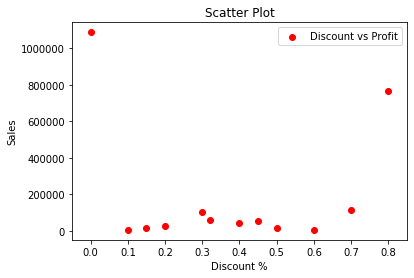

In [21]:
#discount and profit
plt.scatter(df1.Discount.unique(),df11, label='Discount vs Profit', color='r')

plt.title('Scatter Plot')
plt.xlabel('Discount %')
plt.ylabel('Sales')

plt.legend()

plt.show()


In [20]:
df.Discount.unique()

array([0.  , 0.45, 0.2 , 0.8 , 0.3 , 0.5 , 0.7 , 0.6 , 0.32, 0.1 , 0.4 ,
       0.15])

In [24]:
df2= df[['Category','Quantity']]
df21= df2.groupby('Category').sum()
df21

,Quantity
Category,
Furniture,8028
Office Supplies,22906
Technology,6939


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  """


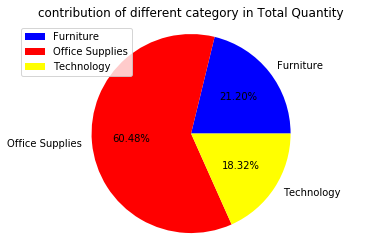

In [26]:
#category and quantity
labels = df2.Category.unique()
colors  = ['blue','red','yellow']
plt.title("contribution of different category in Total Quantity")
plt.pie(df21,labels = labels,colors = colors,autopct = "%0.2f%%",radius = 1.5)
plt.legend(loc ='upper left')
plt.tight_layout()
plt.axis('equal')
plt.show()

In [31]:
df3=df.[['Order Date','Quantity']]

SyntaxError: invalid syntax (<ipython-input-31-fcba1679c157>, line 1)

In [60]:
df4=df[['Order Date','Quantity', 'Sales']]
df4

,Order Date,Quantity,Sales
0,2017-11-08,2,261.9600
1,2017-11-08,3,731.9400
2,2017-06-12,2,14.6200
3,2016-10-11,5,957.5775
4,2016-10-11,2,22.3680
...,...,...,...
9989,2015-01-21,3,25.2480
9990,2018-02-26,2,91.9600
9991,2018-02-26,2,258.5760
9992,2018-02-26,4,29.6000


In [61]:
#orderdate and quantity
df41=df4.groupby('Order Date').sum()
df41

,Quantity,Sales
Order Date,,
2015-01-03,2,16.4480
2015-01-04,8,288.0600
2015-01-05,3,19.5360
2015-01-06,30,4407.1000
2015-01-07,10,87.1580
...,...,...
2018-12-26,12,814.5940
2018-12-27,6,177.6360
2018-12-28,64,1657.3508


In [62]:
df4.rename(columns={'Order Date': 'Order_Date'}, inplace= True)

In [63]:
df4

,Order_Date,Quantity,Sales
0,2017-11-08,2,261.9600
1,2017-11-08,3,731.9400
2,2017-06-12,2,14.6200
3,2016-10-11,5,957.5775
4,2016-10-11,2,22.3680
...,...,...,...
9989,2015-01-21,3,25.2480
9990,2018-02-26,2,91.9600
9991,2018-02-26,2,258.5760
9992,2018-02-26,4,29.6000


In [64]:
df4['Year'] = df4.Order_Date.dt.year

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [65]:
df4

,Order_Date,Quantity,Sales,Year
0,2017-11-08,2,261.9600,2017
1,2017-11-08,3,731.9400,2017
2,2017-06-12,2,14.6200,2017
3,2016-10-11,5,957.5775,2016
4,2016-10-11,2,22.3680,2016
...,...,...,...,...
9989,2015-01-21,3,25.2480,2015
9990,2018-02-26,2,91.9600,2018
9991,2018-02-26,2,258.5760,2018
9992,2018-02-26,4,29.6000,2018


In [66]:
df41= df4.groupby('Year').sum()

In [67]:
df41

,Quantity,Sales
Year,,
2015,7581,484247.4981
2016,7979,470532.5090
2017,9837,609205.5980
2018,12476,733215.2552


In [68]:
a1= df4.Year.unique()
a1

array([2017, 2016, 2015, 2018], dtype=int64)

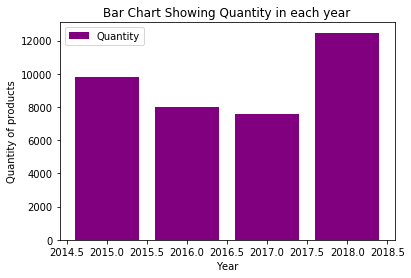

In [70]:
#Bar Chart Showing Quantity in each year
plt.bar(a1, df41.Quantity, label='Quantity', color='purple')


plt.title('Bar Chart Showing Quantity in each year')
plt.xlabel('Year')
plt.ylabel('Quantity of products')
plt.legend()

plt.show()

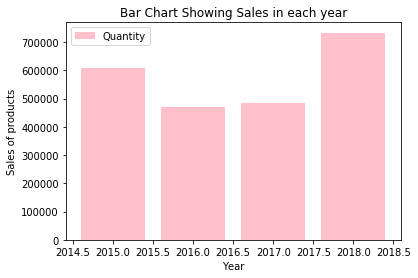

In [72]:
plt.bar(a1, df41.Sales, label='Quantity', color='pink')


plt.title('Bar Chart Showing Sales in each year')
plt.xlabel('Year')
plt.ylabel('Sales of products')
plt.legend()

plt.show()

In [73]:
df5= df[['Category','Profit']]
df5

,Category,Profit
0,Furniture,41.9136
1,Furniture,219.5820
2,Office Supplies,6.8714
3,Furniture,-383.0310
4,Office Supplies,2.5164
...,...,...
9989,Furniture,4.1028
9990,Furniture,15.6332
9991,Technology,19.3932
9992,Office Supplies,13.3200


In [75]:
df51= df5.groupby('Category').sum()
df51

,Profit
Category,
Furniture,18451.2728
Office Supplies,122490.8008
Technology,145454.9481


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  import sys


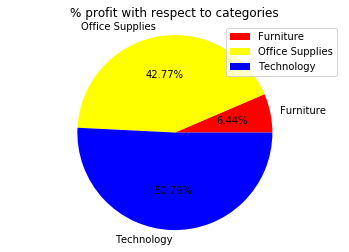

In [76]:
#category and profit
df5= df[['Category','Profit']]

labels = ['Furniture','Office Supplies','Technology']
colors  = ['red','yellow','blue']
plt.title("% profit with respect to categories")
plt.pie(df51,labels = labels,colors = colors,autopct = "%0.2f%%",radius = 1.5)
plt.axis('equal')
plt.legend()
plt.show()

In [81]:
df6= df[['Region','Sales', 'State']]
df6

,Region,Sales,State
0,South,261.9600,Kentucky
1,South,731.9400,Kentucky
2,West,14.6200,California
3,South,957.5775,Florida
4,South,22.3680,Florida
...,...,...,...
9989,South,25.2480,Florida
9990,West,91.9600,California
9991,West,258.5760,California
9992,West,29.6000,California


In [82]:
df61=df6.groupby('Region').sum()
df61

,Sales
Region,
Central,501239.8908
East,678781.2400
South,391721.9050
West,725457.8245


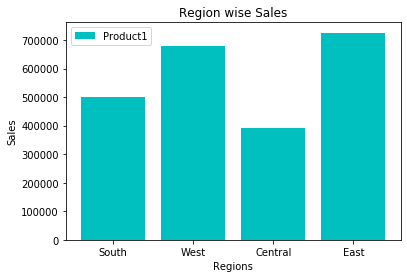

In [79]:
#region wise sale comparison
plt.bar(df6.Region.unique(),df61.Sales, label='Product1', color='c')
plt.title('Region wise Sales')
plt.xlabel('Regions')
plt.ylabel('Sales')
plt.legend()

plt.show()


In [83]:
df62= df6.groupby('State').sum()
df62

,Sales
State,
Alabama,19510.6400
Arizona,35282.0010
Arkansas,11678.1300
California,457687.6315
Colorado,32108.1180
Connecticut,13384.3570
Delaware,27451.0690
District of Columbia,2865.0200
Florida,89473.7080


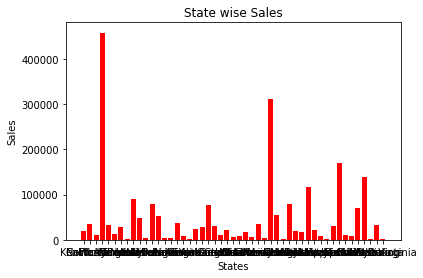

In [84]:
#statewise sales

plt.bar(df6.State.unique(), df62.Sales, color= 'r')
plt.title('State wise Sales')
plt.xlabel('States')
plt.ylabel('Sales')

plt.show()